## Analisis Text Classification Resep Masakan

Detail Analisis : Text Classification Resep Masakan Daging dan Non-Daging (Meat and Non-Meat)

Tujuan : Memprediksi suatu resep masakan apakah termasuk dari class Meat atau Class Non-Meat dilihat dari ingredients (bahan bahannya).

Target Audience : Orang dalam diet Pescatarian (tidak mengkonsumsi daging merah dan daging unggas)

Goal : Membedakan resep masakan mana yang mengandung daging merah dan daging unggas dengan yang tidak

## Bagian 1 : Pengumpulan Data

Melakukan scrapping data yang bersumber dari free API bernama **TheMealDB**. Data diambil pada hari Minggu, 18 November 2024. Dengan pengambilan seluruh data yang diperbolehkan oleh free API TheMealDB.

Dataset : Kumpulan Resep Masakan dalam bahasa inggris

Jumlah Data : 303 data resep masakan

Fitur yang dipilih :

        - name (nama dari resep masakan), con : "Beef and Mustard Pie" (tipe data string)
        
        - category (14 kategori unik dari resep masakan), tipe data string
        
        - ingredients (list dari bahan-bahan dari resep masakan), con : "["1kg Beef", "2 tbs Plain Flour", "2 tbs Rapeseed Oil", "200ml Red Wine", "400ml Beef Stock"]" (tipe data list of strings)
        
*Kategori Unik : Dessert (65 resep), Beef (46 resep), Vegetarian (40 resep),Chicken (36 resep), Seafood (29 resep), Pork (19 resep), Side (17 resep), Lamb (15 resep), Miscellaneous (11 resep), Pasta (9 resep), Breakfast (8 resep), Starter (4 resep), Vegan (3 resep), Goat (1 resep).

** Fitur instruction (pentunjuk memasak resep) tidak dipilih karena analisis akan berfokus pada perbedaan class berdasarkan ingredients resep.

In [1]:
# -------------------------------
#  Scrapping Dataset API MealDB
# -------------------------------

### Code Scrapping Dataset Resep Masakan dari API TheMealDB ###

import requests
import json

def get_categories():
    """Fetch all categories from the MealDB API."""
    url = "https://www.themealdb.com/api/json/v1/1/categories.php"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return [category['strCategory'] for category in data.get('categories', [])]
    else:
        print("Failed to fetch categories.")
        return []

def get_meals_by_category(category):
    """Fetch all meals in a specific category."""
    url = "https://www.themealdb.com/api/json/v1/1/filter.php"
    params = {"c": category}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data.get('meals', [])
    else:
        print(f"Failed to fetch meals for category: {category}")
        return []

def get_meal_details(meal_id):
    """Fetch detailed information for a specific meal."""
    url = "https://www.themealdb.com/api/json/v1/1/lookup.php"
    params = {"i": meal_id}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json().get('meals', [])[0]
    else:
        print(f"Failed to fetch details for meal ID: {meal_id}")
        return None

def fetch_all_recipes():
    """Fetch all recipes with name, category, and ingredients."""
    recipes = []
    categories = get_categories()
    if not categories:
        print("No categories found.")
        return []

    for category in categories:
        print(f"Fetching meals for category: {category}")
        meals = get_meals_by_category(category)
        for meal in meals:
            meal_id = meal['idMeal']
            details = get_meal_details(meal_id)
            if details:
                # Extract ingredients
                ingredients = []
                for i in range(1, 21):  # MealDB API provides up to 20 ingredients
                    ingredient = details.get(f"strIngredient{i}")
                    measure = details.get(f"strMeasure{i}")
                    if ingredient and ingredient.strip():
                        ingredients.append(f"{measure.strip()} {ingredient.strip()}")

                # Add recipe data
                recipes.append({
                    "name": details.get("strMeal"),
                    "category": details.get("strCategory"),
                    "ingredients": ingredients,
                })
    return recipes

def save_to_json(data, filename):
    """Save data to a JSON file."""
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)
    print(f"Data saved to {filename}")

# Save dataset to file all_recipes.json
if __name__ == "__main__":
    print("Fetching all recipes...")
    all_recipes = fetch_all_recipes()
    print(f"Fetched {len(all_recipes)} recipes.")
    save_to_json(all_recipes, "all_recipess.json")


Fetching all recipes...
Fetching meals for category: Beef
Fetching meals for category: Chicken
Fetching meals for category: Dessert
Failed to fetch details for meal ID: 52854
Failed to fetch details for meal ID: 52902
Failed to fetch details for meal ID: 52862
Failed to fetch details for meal ID: 52861
Failed to fetch details for meal ID: 52958
Failed to fetch details for meal ID: 52916
Failed to fetch details for meal ID: 53022
Failed to fetch details for meal ID: 53046
Failed to fetch details for meal ID: 52932
Failed to fetch details for meal ID: 52857
Failed to fetch details for meal ID: 52901
Failed to fetch details for meal ID: 52786
Failed to fetch details for meal ID: 53024
Failed to fetch details for meal ID: 52833
Failed to fetch details for meal ID: 53054
Failed to fetch details for meal ID: 52886
Failed to fetch details for meal ID: 52883
Failed to fetch details for meal ID: 52793
Failed to fetch details for meal ID: 53082
Failed to fetch details for meal ID: 53005
Failed t

In [2]:
# prompt: membaca file json hasil scrapping data

from google.colab import drive
import json

drive.mount('/content/drive')

# Replace 'path/to/your/file.json' with the actual path to your JSON file in Google Drive
file_path = '/content/drive/MyDrive/all_recipes.json'

with open(file_path, 'r') as f:
  data = json.load(f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## melihat head data dari all_recipes.json ##

import pandas as pd

def head_json(filename, n=5):
  """Displays the head of a JSON file as a DataFrame."""
  try:
    df = pd.read_json(filename)
    print(df.head(n))
  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
  except Exception as e:
    print(f"An error occurred: {e}")

head_json('/content/drive/MyDrive/all_recipes.json')

                                                name category  \
0                               Beef and Mustard Pie     Beef   
1                                Beef and Oyster pie     Beef   
2                                         Beef Asado     Beef   
3  Beef Banh Mi Bowls with Sriracha Mayo, Carrot ...     Beef   
4                                   Beef Bourguignon     Beef   

                                         ingredients  
0  [1kg Beef, 2 tbs Plain Flour, 2 tbs Rapeseed O...  
1  [900g Beef, 3 tbs Olive Oil, 3 Shallots, 2 clo...  
2  [1.5kg Beef, 1 Beef Stock Concentrate, 8 ounce...  
3  [White Rice, 1 Onion, 1 Lime, 3 Garlic Clove, ...  
4  [3 tsp Goose Fat, 600g Beef Shin, 100g Bacon, ...  


In [4]:
## melihat detail dari dataset ##

def describe_dataset(filename):
  """Displays descriptive statistics of a JSON file as a DataFrame."""
  try:
    df = pd.read_json(filename)
    print(df.describe())  # Use describe() for basic statistics
    print("\nData Types:")
    print(df.dtypes)  # Show data types of each column
    print("\nInfo:")
    print(df.info())  # Display concise summary of the DataFrame
  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
  except Exception as e:
    print(f"An error occurred: {e}")


describe_dataset('/content/drive/MyDrive/all_recipes.json')

                        name category  \
count                    303      303   
unique                   303       14   
top     Beef and Mustard Pie  Dessert   
freq                       1       65   

                                              ingredients  
count                                                 303  
unique                                                303  
top     [1kg Beef, 2 tbs Plain Flour, 2 tbs Rapeseed O...  
freq                                                    1  

Data Types:
name           object
category       object
ingredients    object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         303 non-null    object
 1   category     303 non-null    object
 2   ingredients  303 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB
None


Total data : 303 data

Kategori Unik : 14

Null : 0

Column : name, category, ingredients

Tipe Data : semua bertipe data object untuk ketiga column


## Bagian 2: Pra-Pemrosesan Teks (Text Pre-processing)

Handle Data Awal

Pada Data Awal, dataset memiliki sejumlah 14 kategori unik. Analisis yang akan dilakukan ialah analisis text classification meat or non-meat (2 class/kategori). Oleh karena itu perlu adanya penggabungan kategori dengan kriteria : jika resep yang mengandung ingredients "beef", "chicken", "pork", "lamb", "goat" maka masuk kedalam class Meat. Sisanya resep akan masuk kedalam class Non-Meat.

Hasil tiap class memiliki sejumlah data:

- Class Meat : 129 data
- Class Non-Meat : 174 data



In [33]:
# -------------------------------
#       Recipe Labelling
# -------------------------------


### Memberikan (penambahan) label/kategori Meat or Non-Meat pada dataset ###

import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/all_recipes.json'
data = pd.read_json(file_path)

# Preprocess the ingredients by converting them into a hashable format ( a string)
data['ingredients_str'] = data['ingredients'].apply(lambda x: " | ".join(x))

# Define meat categories and keywords
meat_categories = ["Beef", "Chicken", "Pork", "Lamb", "Goat"]
meat_ingredients_keywords = ["beef", "chicken", "pork", "lamb", "goat"]

# Identify recipes explicitly in meat categories
meat_recipes = data[data['category'].isin(meat_categories)]

# Identify recipes with ingredients containing meat-related keywords
meat_ingredient_recipes = data[data['ingredients_str'].apply(
    lambda ingredients: any(meat in ingredients.lower() for meat in meat_ingredients_keywords))]

# Combine recipes explicitly labeled as meat and those with meat-related ingredients
all_meat_recipes = pd.concat([meat_recipes, meat_ingredient_recipes]).drop_duplicates(subset='name')

# Create a binary column 'label' indicating if a recipe is meat-based or not
data['label'] = data['name'].isin(all_meat_recipes['name']).replace({True: 'Meat', False: 'Non-Meat'})

# Save the processed data (optional)
data.to_csv('labeled_recipes.csv', index=False)  # Save the processed dataset to a CSV file

# Display dataset information and updated dataset
print(data.info())  # Display dataset info
print(data[['name', 'category', 'label']].head())  # Preview the updated dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             303 non-null    object
 1   category         303 non-null    object
 2   ingredients      303 non-null    object
 3   ingredients_str  303 non-null    object
 4   label            303 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB
None
                                                name category label
0                               Beef and Mustard Pie     Beef  Meat
1                                Beef and Oyster pie     Beef  Meat
2                                         Beef Asado     Beef  Meat
3  Beef Banh Mi Bowls with Sriracha Mayo, Carrot ...     Beef  Meat
4                                   Beef Bourguignon     Beef  Meat


In [34]:
## melihat detail kolom label pada labeled_recipes.csv ##

import pandas as pd

# Load the labeled_recipes.csv file
df = pd.read_csv('labeled_recipes.csv')

# Display details of the 'label' column
print("Label Column Details:")
print(df['label'].value_counts())  # Count occurrences of each label
print("\nUnique Labels:")
print(df['label'].unique())  # List unique labels

Label Column Details:
label
Non-Meat    174
Meat        129
Name: count, dtype: int64

Unique Labels:
['Meat' 'Non-Meat']


In [35]:
# -------------------------------
#       Text Preprocessing
# -------------------------------

### Melakukan preprocessing mengubah menjadi huruf kecil dan penghapusan angka, ###
### tanda baca dan karakter khusus, ukuran unit, punctuation, stopword serta    ###
### tokenisasi dan stemming                                                     ###

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string

# Ensure necessary NLTK data is available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the dataset
file_path = 'labeled_recipes.csv'
data = pd.read_csv(file_path)

# Instantiate tools for preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Step 1: Remove numbers combined with measurement units
def remove_numbers_and_units(text):
    # Lowercase the text
    text = text.lower()
    # Remove numbers with units (e.g., 1kg, 200ml, 900g)
    text = re.sub(r'\b(\d+/\d+|\d+|½|1½|1½|1¾|1¾)\s?(kg|g|tbs|tbsp|ml|oz|lb|cup|cups|teaspoon|teaspoons|tsp|tablespoon|tablespoons|tblsp|litre|litres|grams|ounce|ounces|pound|pounds|dash|slice|slices|handful|pinch|cm|chopped|chop|12fl|1l|2l|2l)\b', '', text)
    # Remove remaining numbers
    text = re.sub(r'\b\d+\b', '', text)
    return text

# Step 2: Remove punctuation, tokenize, remove stopwords, and apply stemming
def full_preprocess(text):
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", " ", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoin tokens into a single string
    return " ".join(tokens)

# Apply preprocessing steps
data['no_numbers_units'] = data['ingredients_str'].apply(remove_numbers_and_units)
data['processed_ingredients'] = data['no_numbers_units'].apply(full_preprocess)

# Display a sample before and after preprocessing
comparison_columns = data[['ingredients_str', 'processed_ingredients']].head()

# Display the processed data for comparison
print(comparison_columns)

# Save processed data
data.to_csv('processed_ingredients.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                     ingredients_str  \
0  1kg Beef | 2 tbs Plain Flour | 2 tbs Rapeseed ...   
1  900g Beef | 3 tbs Olive Oil | 3 Shallots | 2 c...   
2  1.5kg Beef | 1 Beef Stock Concentrate | 8 ounc...   
3  White Rice | 1 Onion | 1 Lime | 3 Garlic Clove...   
4  3 tsp Goose Fat | 600g Beef Shin | 100g Bacon ...   

                               processed_ingredients  
0  beef plain flour rapese oil red wine beef stoc...  
1  beef oliv oil shallot clove minc garlic bacon ...  
2  beef beef stock concentr tomato pure water soy...  
3  white rice onion lime garlic clove cucumb carr...  
4  goos fat beef shin bacon challot chestnut mush...  


In [36]:
## melihat head data dari 'processed_ingredients.csv' ##

# Load the processed_ingredients.csv file
df = pd.read_csv('processed_ingredients.csv')

# Display the head of the DataFrame
print(df.head())

                                                name category  \
0                               Beef and Mustard Pie     Beef   
1                                Beef and Oyster pie     Beef   
2                                         Beef Asado     Beef   
3  Beef Banh Mi Bowls with Sriracha Mayo, Carrot ...     Beef   
4                                   Beef Bourguignon     Beef   

                                         ingredients  \
0  ['1kg Beef', '2 tbs Plain Flour', '2 tbs Rapes...   
1  ['900g Beef', '3 tbs Olive Oil', '3 Shallots',...   
2  ['1.5kg Beef', '1 Beef Stock Concentrate', '8 ...   
3  ['White Rice', '1 Onion', '1 Lime', '3 Garlic ...   
4  ['3 tsp Goose Fat', '600g Beef Shin', '100g Ba...   

                                     ingredients_str label  \
0  1kg Beef | 2 tbs Plain Flour | 2 tbs Rapeseed ...  Meat   
1  900g Beef | 3 tbs Olive Oil | 3 Shallots | 2 c...  Meat   
2  1.5kg Beef | 1 Beef Stock Concentrate | 8 ounc...  Meat   
3  White Rice | 1 Onion 

## Bagian 3 : Rekayasa Fitur (Feature Engineering)

Konsep TF-IDF :

TF (Term Frequency): Mengukur seberapa sering kata muncul dalam sebuah dokumen.

    TF(𝑡) = (Jumlah kemunculan term t dalam dokumen) / (Jumlah total term dalam dokumen)

IDF (Inverse Document Frequency) : Mengukur seberapa unik sebuah kata di seluruh dokumen.

    IDF(𝑡)= log ((Jumlah total dokumen) / (Jumlah dokumen yang mengnadung term t))

TF-IDF : Kombinasi dari kedua metrik tersebut.

    TF-IDF(𝑡) = TF(𝑡) x IDF(𝑡)

TF-IDF membantu memberikan bobot lebih tinggi untuk kata-kata yang sering muncul di dokumen tertentu tetapi jarang di dokumen lain.

Konsep Word2Vec :

Word2Vec adalah teknik pemrosesan bahasa alami untuk membuat representasi vektor dari kata-kata. Representasi ini disebut word embeddings, di mana kata-kata dengan konteks serupa memiliki vektor yang saling dekat dalam ruang vektor.

Word2Vec memiliki dua pendekatan utama:
- CBOW (Continuous Bag of Words): Model ini memprediksi kata berdasarkan konteksnya. Contoh: Diberikan kalimat "saya suka makan [roti]", model mencoba memprediksi kata "roti".
- Skip-gram : Model ini memprediksi konteks dari kata tertentu. Contoh: Diberikan kata "roti", model mencoba memprediksi kata-kata seperti "suka", "makan", dll.

Word2Vec menghasilkan vektor yang dapat digunakan sebagai fitur untuk berbagai tugas seperti klasifikasi teks.

In [39]:
# -------------------------------
#  Feature Engineering
# -------------------------------


### Melakukan extraksi fitur menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency) dan Word2Vec ###

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from gensim.models import Word2Vec
import numpy as np

# Load the dataset
file_path = 'processed_ingredients.csv'
data = pd.read_csv(file_path)

# Extract the processed text data
text_data = data['processed_ingredients']
labels = data['label']


## Teknik ekstraksi fitur TF-IDF ##

# Initialize TF-IDF Vectorizer with custom parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,   # Increase max features
    min_df=2,            # Remove very rare terms
    max_df=0.9,          # Remove overly common terms
    ngram_range=(1, 2)   # Include unigrams and bigrams
)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert to DataFrame for better handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Perform feature selection using Chi-Square
k_best_features = 500  # Number of features to select
selector = SelectKBest(chi2, k=k_best_features)
tfidf_selected = selector.fit_transform(tfidf_matrix, labels)

# Get selected feature names
selected_features = selector.get_support(indices=True)
selected_feature_names = [tfidf_vectorizer.get_feature_names_out()[i] for i in selected_features]
print("Top Selected TF-IDF Features:", selected_feature_names[:10])


## Teknik ekstraksi fitur Word2Vec ##

# Tokenize text for Word2Vec
tokenized_ingredients = text_data.apply(lambda x: x.split())

# Train Word2Vec with optimized parameters
word2vec_model = Word2Vec(
    sentences=tokenized_ingredients,
    vector_size=300,     # Larger vector size for better representation
    window=5,            # Context window size
    min_count=2,         # Ignore rare words
    sg=1,                # Use Skip-Gram model
    workers=4            # Use multiple CPU cores
)

# Create weighted sentence embeddings using TF-IDF scores
def weighted_sentence_embedding(sentence, model, tfidf_vectorizer, vector_size=300):
    words = sentence.split()
    tfidf_scores = tfidf_vectorizer.transform([sentence]).toarray()[0]
    word_vectors = [
        model.wv[word] * tfidf_scores[idx]
        for idx, word in enumerate(words)
        if word in model.wv
    ]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Generate weighted Word2Vec embeddings for the entire dataset
word2vec_embeddings = np.array([
    weighted_sentence_embedding(sent, word2vec_model, tfidf_vectorizer)
    for sent in text_data
])

# Display results
print("TF-IDF Shape After Feature Selection:", tfidf_selected.shape)
print("Word2Vec Embedding Shape:", word2vec_embeddings.shape)

# Save processed features and embeddings for later use
processed_data = pd.concat([data, pd.DataFrame(tfidf_selected)], axis=1)
processed_data.to_csv("processed_with_tfidf_selected.csv", index=False)
np.save("word2vec_embeddings.npy", word2vec_embeddings)
print("Processed data saved.")

# View the TF-IDF DataFrame (you can specify which columns you want to see)
print(" Representasi TF-IDF DataFrame (last 5 rows):")
print(tfidf_df.head())  # You can adjust the number of rows to view

# View the Word2Vec embeddings for a specific row (e.g., the first row)
print("Word2Vec Embedding for the first row:")
word2vec_embeddings[0]

Top Selected TF-IDF Features: ['2l', '2l water', 'almond', 'almond butter', 'almond extract', 'almond milk', 'appl', 'appl butter', 'apricot jam', 'artichok']
TF-IDF Shape After Feature Selection: (303, 500)
Word2Vec Embedding Shape: (303, 300)
Processed data saved.
TF-IDF DataFrame (last 5 rows):
   12fl   1l   2l  2l water  allspic  almond  almond butter  almond extract  \
0   0.0  0.0  0.0       0.0      0.0     0.0            0.0             0.0   
1   0.0  0.0  0.0       0.0      0.0     0.0            0.0             0.0   
2   0.0  0.0  0.0       0.0      0.0     0.0            0.0             0.0   
3   0.0  0.0  0.0       0.0      0.0     0.0            0.0             0.0   
4   0.0  0.0  0.0       0.0      0.0     0.0            0.0             0.0   

   almond milk  anchovi  ...  yellow  yellow pepper  yogurt  yogurt garnish  \
0          0.0      0.0  ...     0.0            0.0     0.0             0.0   
1          0.0      0.0  ...     0.0            0.0     0.0         

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Bagian 4: Analisis Data Eksploratif dan Visualisasi

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   303 non-null    object
 1   category               303 non-null    object
 2   ingredients            303 non-null    object
 3   ingredients_str        303 non-null    object
 4   label                  303 non-null    object
 5   no_numbers_units       303 non-null    object
 6   processed_ingredients  303 non-null    object
 7   0                      303 non-null    object
dtypes: object(8)
memory usage: 19.1+ KB
None

Sample Data:
                                                name category  \
0                               Beef and Mustard Pie     Beef   
1                                Beef and Oyster pie     Beef   
2                                         Beef Asado     Beef   
3  Beef Banh Mi Bowls with Sriracha Mayo, Carrot ...

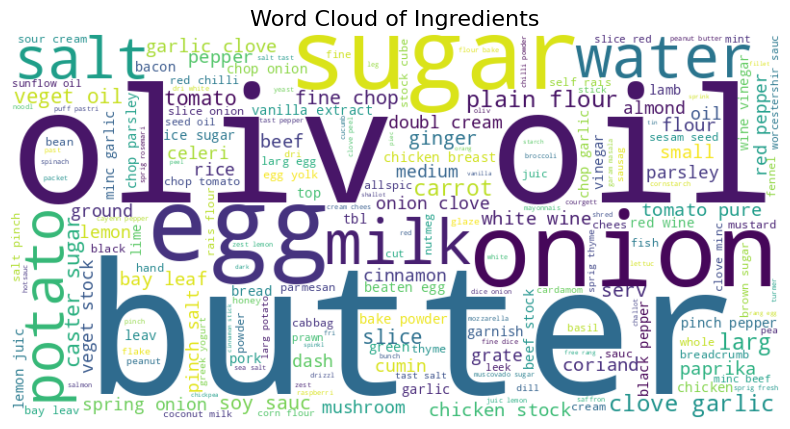

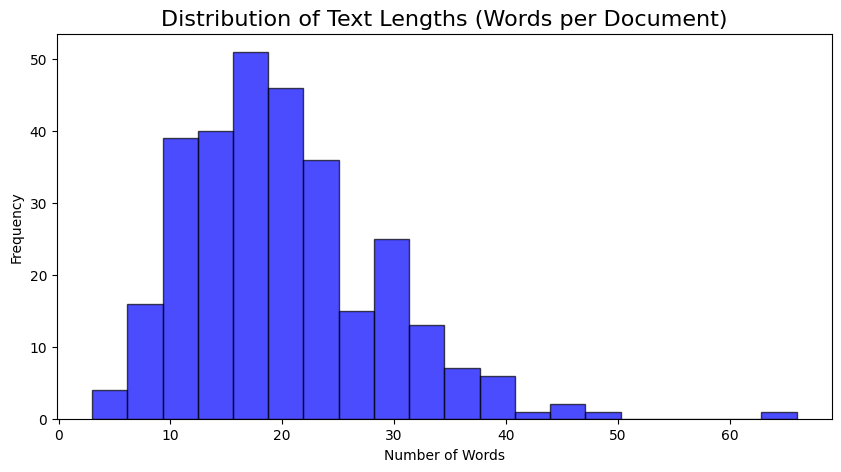

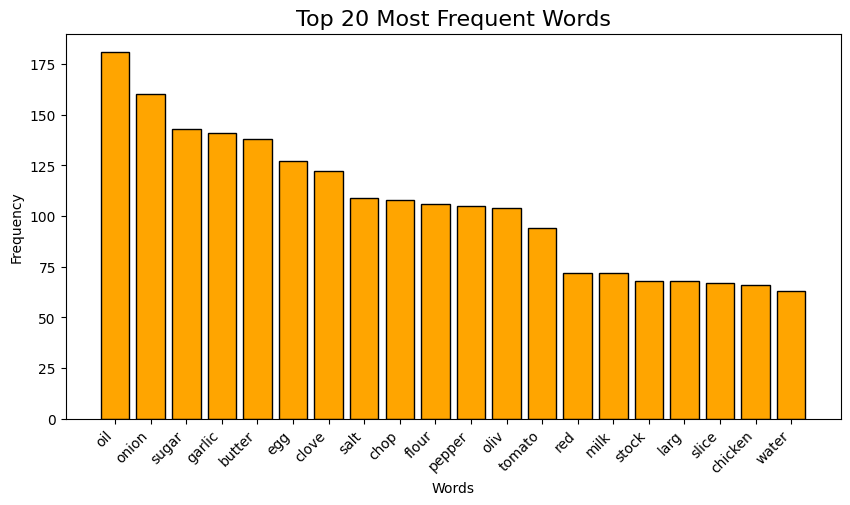

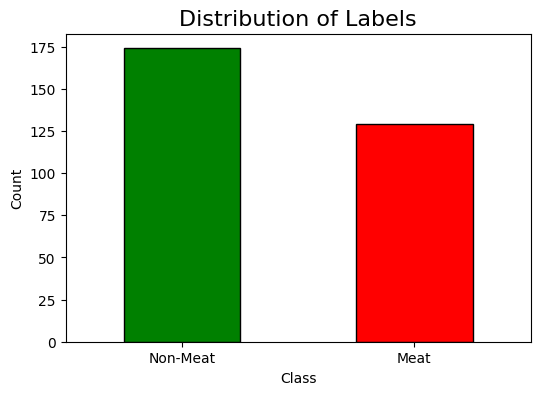

In [40]:
# ---------------------------------------------
#  Analisis Data Exploratif dan Visualisasi
# ---------------------------------------------


### Melakukanan analisis data eksploratid pada data text dengan menggunakan ###
### Word Cloud untuk visualisasi kata yang paling sering muncul, plot distribusi ###
### Bar Plot untuk visualisasi frekuensi kata teratas ###

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = 'processed_with_tfidf_selected.csv'
data = pd.read_csv(file_path)

# Display the dataset structure
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

# Extract relevant columns
text_data = data['processed_ingredients']
labels = data['label']

# Combine all text data for Word Cloud generation
combined_text = " ".join(text_data)

# 1. Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Ingredients", fontsize=16)
plt.show()

# 2. Plot Text Length Distribution (Number of Words per Document)
text_lengths = text_data.apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(text_lengths, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Text Lengths (Words per Document)", fontsize=16)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 3. Visualize Top 20 Most Frequent Words
# Tokenize and count words
all_words = [word for text in text_data for word in text.split()]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

# Bar Plot for Top 20 Words
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='orange', edgecolor='black')
plt.title("Top 20 Most Frequent Words", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# 4. Analyze Distribution of Labels (Meat vs Non-Meat)
label_counts = labels.value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title("Distribution of Labels", fontsize=16)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


Dapat disimpulkan bahwa kata yang paling sering muncul adalah oil, onion, sugar. Dengan total resep untuk kata oil ada di lebih dari 175 resep. Bagi orang dalam diet pescatarian yang juga sedang menghindari konsumsi makanan yang di goreng perlu mempertimbangkan pemilihan beberapa resep dengan sebaik baiknya.

## Bagian 5: Klasifikasi Teks

Karena data yang didapatkan sedikit, sehingga dipilih metode machine learning sederhana SVM dan Random Forest yang efektif digunakan untuk feature engineering TF-IDF dan Word2Vec sehingga dapat menghindari overfitting.

In [13]:
# -------------------------------
#  Klasifikasi Teks
# -------------------------------


### Melatih model klasifikasi teks menggunakan metode SVM dan Random Forest ###

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset
file_path = 'processed_with_tfidf_selected.csv'
data = pd.read_csv(file_path)

# Assume TF-IDF and Word2Vec features have already been prepared
# For TF-IDF
tfidf_matrix = tfidf_selected
# For Word2Vec
word2vec_embeddings = np.load("word2vec_embeddings.npy")

# Extract labels
labels = data['label']

# Encode labels as integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    tfidf_matrix, y, test_size=0.1, random_state=42, stratify=y
)

X_train_word2vec, X_test_word2vec, _, _ = train_test_split(
    word2vec_embeddings, y, test_size=0.1, random_state=42, stratify=y
)

# Standardize Word2Vec embeddings (important for SVM)
scaler = StandardScaler()
X_train_word2vec_scaled = scaler.fit_transform(X_train_word2vec)
X_test_word2vec_scaled = scaler.transform(X_test_word2vec)

# Initialize classifiers
svm_tfidf = SVC(kernel='linear', random_state=42)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

svm_word2vec = SVC(kernel='linear', random_state=42)
rf_word2vec = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate on TF-IDF
print("\n=== Using TF-IDF Features ===")
# SVM
svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_predictions = svm_tfidf.predict(X_test_tfidf)
print("\nSVM Results (TF-IDF):")
print(classification_report(y_test, svm_tfidf_predictions))
print("Accuracy:", accuracy_score(y_test, svm_tfidf_predictions))

# Random Forest
rf_tfidf.fit(X_train_tfidf, y_train)
rf_tfidf_predictions = rf_tfidf.predict(X_test_tfidf)
print("\nRandom Forest Results (TF-IDF):")
print(classification_report(y_test, rf_tfidf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_tfidf_predictions))

# Train and evaluate on Word2Vec
print("\n=== Using Word2Vec Features ===")
# SVM
svm_word2vec.fit(X_train_word2vec_scaled, y_train)
svm_word2vec_predictions = svm_word2vec.predict(X_test_word2vec_scaled)
print("\nSVM Results (Word2Vec):")
print(classification_report(y_test, svm_word2vec_predictions))
print("Accuracy:", accuracy_score(y_test, svm_word2vec_predictions))

# Random Forest
rf_word2vec.fit(X_train_word2vec_scaled, y_train)
rf_word2vec_predictions = rf_word2vec.predict(X_test_word2vec_scaled)
print("\nRandom Forest Results (Word2Vec):")
print(classification_report(y_test, rf_word2vec_predictions))
print("Accuracy:", accuracy_score(y_test, rf_word2vec_predictions))



=== Using TF-IDF Features ===

SVM Results (TF-IDF):
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.85      0.94      0.89        18

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31

Accuracy: 0.8709677419354839

Random Forest Results (TF-IDF):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.84      0.89      0.86        18

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.83        31
weighted avg       0.84      0.84      0.84        31

Accuracy: 0.8387096774193549

=== Using Word2Vec Features ===

SVM Results (Word2Vec):
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.59      0.94 

***Hasil Evaluasi Model SVM dan Random Forest***

SVM Results (TF-IDF):
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.85      0.94      0.89        18

    accuracy                           0.87        31
    macro avg       0.88      0.86      0.86        31
    weighted avg    0.87      0.87      0.87        31

Accuracy: **0.8709677419354839**

Random Forest Results (TF-IDF):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.84      0.89      0.86        18

    accuracy                           0.84        31
    macro avg       0.84      0.83      0.83        31
    weighted avg    0.84      0.84      0.84        31

Accuracy: **0.8387096774193549**

=== Using Word2Vec Features ===

SVM Results (Word2Vec):
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.59      0.94      0.72        18

    accuracy                           0.58        31
    macro avg       0.54      0.51      0.43        31
    weighted avg    0.55      0.58      0.48        31

Accuracy: **0.5806451612903226**

Random Forest Results (Word2Vec):
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.59      0.94      0.72        18

    accuracy                           0.58        31
    macro avg       0.54      0.51      0.43        31
    weighted avg    0.55      0.58      0.48        31

Accuracy: **0.5806451612903226**

In [14]:
# ----------------------------------
#  Prediksi Model untuk Resep Baru
# ----------------------------------


# New recipe for prediction
new_recipe = "chicken, olive oil, garlic, salt, pepper, lemon juice"

# Define a function to process new recipe data
def preprocess_new_data(recipe_text, tfidf_vectorizer, word2vec_model, scaler, num_features=500): # add num_features
    # TF-IDF Transformation
    tfidf_features = tfidf_vectorizer.transform([recipe_text])

    # Limit TF-IDF features to the expected number
    tfidf_features = tfidf_features[:, :num_features] # select the first 500 features

    # Word2Vec Embedding (Weighted by TF-IDF)
    def weighted_sentence_embedding(sentence, model, vectorizer, vector_size=300):
        words = sentence.split()
        tfidf_scores = vectorizer.transform([sentence]).toarray()[0]
        word_vectors = [
            model.wv[word] * tfidf_scores[idx]
            for idx, word in enumerate(words)
            if word in model.wv
        ]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(vector_size)

    word2vec_features = weighted_sentence_embedding(recipe_text, word2vec_model, tfidf_vectorizer)
    word2vec_features_scaled = scaler.transform([word2vec_features])  # Scale Word2Vec features

    return tfidf_features, word2vec_features_scaled

# Call the preprocess_new_data function with num_features
tfidf_features, word2vec_features_scaled = preprocess_new_data(
    new_recipe, tfidf_vectorizer, word2vec_model, scaler, num_features=500)

# Preprocess the new recipe data
tfidf_features, word2vec_features_scaled = preprocess_new_data(new_recipe, tfidf_vectorizer, word2vec_model, scaler)

# Predict using trained SVM and Random Forest
print("\n=== Predictions for New Recipe ===")
print(f"Input Recipe: {new_recipe}")

# SVM with TF-IDF
svm_tfidf_prediction = svm_tfidf.predict(tfidf_features)
print(f"SVM Prediction (TF-IDF): {label_encoder.inverse_transform(svm_tfidf_prediction)[0]}")

# Random Forest with TF-IDF
rf_tfidf_prediction = rf_tfidf.predict(tfidf_features)
print(f"Random Forest Prediction (TF-IDF): {label_encoder.inverse_transform(rf_tfidf_prediction)[0]}")

# SVM with Word2Vec
svm_word2vec_prediction = svm_word2vec.predict(word2vec_features_scaled)
print(f"SVM Prediction (Word2Vec): {label_encoder.inverse_transform(svm_word2vec_prediction)[0]}")

# Random Forest with Word2Vec
rf_word2vec_prediction = rf_word2vec.predict(word2vec_features_scaled)
print(f"Random Forest Prediction (Word2Vec): {label_encoder.inverse_transform(rf_word2vec_prediction)[0]}")



=== Predictions for New Recipe ===
Input Recipe: chicken, olive oil, garlic, salt, pepper, lemon juice
SVM Prediction (TF-IDF): Non-Meat
Random Forest Prediction (TF-IDF): Non-Meat
SVM Prediction (Word2Vec): Non-Meat
Random Forest Prediction (Word2Vec): Non-Meat


Model SVM dan Random Forest untuk masing masing feature extraction TF-IDF dan Word2Vec dapat memprediksi class dari resep baru dengan baik.

## Bagian 6: Soal Teori

1. Berikan penjelasan Anda mengenai perbedaan antara text classification dengan text clustering?

  text classification untuk pengklasifikasian teks ke dalam kategori yang telah ditentukan (data label telah tersedia / data berlabel) yang tujuannya untuk melakukan prediksi, text clustering untuk pengelompokan teks berdasarkan kesamaan (similarity) tanpa adanya kategori acuan (data non label) yang tujuannya untuk mengenali pola dari data.


2. Kapan text clustering dapat dilakukan pada data teks? Jelaskan situasi atau kondisi di mana teknik ini bermanfaat dan berikan contoh kasus penggunaannya.

  Text clustering digunakan ketika data yang digunakan dalam jumlah yang besar (big data) serta datanya tidak memiliki label sehingga text clustering dibutuhkan untuk pengenalan polanya berdasarkan similarity antar data.
  Contoh penggunaan dalam pengelompokan ulasan roduk: Anda memiliki ribuan ulasan tentang berbagai produk di platform e-commerce dan ingin mengelompokkan ulasan berdasarkan tema (misalnya, ulasan tentang kualitas produk, harga, atau layanan pelanggan) tanpa terlebih dahulu menetapkan kategori.

3. Jika menggunakan algoritma K-means untuk text clustering, bagaimana cara menentukan jumlah klaster optimal? Jelaskan dua metode yang umum digunakan untuk menentukan jumlah klaster optimal.
 Menentukan jumlah klaster yang optimal dalam K-means untuk text clustering bisa menjadi tantangan, karena tidak ada metode yang pasti, tetapi ada beberapa pendekatan yang umum digunakan untuk membantu menentukan jumlah klaster terbaik. Dua metode yang sering digunakan adalah Elbow Method dan Silhouette Score.

1. Elbow Method (Metode Elbow)
Deskripsi: Metode ini mengukur intra-cluster variance atau sum of squared distances (SSD) antara titik data dan pusat klaster (centroid). Tujuannya adalah mencari jumlah klaster di mana penurunan SSD mulai melambat secara signifikan.
Langkah-langkah:
Jalankan algoritma K-means untuk berbagai jumlah klaster (misalnya, mulai dari 1 hingga 10 klaster).
Hitung SSD untuk setiap nilai jumlah klaster.
Plot SSD terhadap jumlah klaster. Biasanya, SSD akan menurun seiring bertambahnya jumlah klaster.
Cari "elbow" pada grafik, yaitu titik di mana penurunan SSD mulai melambat. Titik ini menunjukkan jumlah klaster yang optimal.
Keuntungan: Mudah dipahami dan diterapkan.
Kelemahan: Terkadang titik elbow tidak begitu jelas, sehingga sulit untuk memutuskan jumlah klaster yang tepat.
Contoh Grafik Elbow: Jika Anda memplot SSD terhadap jumlah klaster, grafik mungkin menunjukkan penurunan yang tajam di awal, diikuti oleh penurunan yang lebih lambat setelah titik tertentu. Titik itu adalah "elbow", dan jumlah klaster yang sesuai biasanya terletak di titik tersebut.

2. Silhouette Score
Deskripsi: Silhouette score mengukur seberapa baik titik data cocok dengan klaster yang telah ditugaskan dan seberapa jauh jaraknya dari klaster lain. Nilai silhouette berada dalam rentang -1 hingga +1, dengan nilai yang lebih tinggi menunjukkan klaster yang lebih baik.
Langkah-langkah:
Jalankan K-means untuk berbagai jumlah klaster (misalnya, dari 2 hingga 10 klaster).
Hitung silhouette score untuk setiap jumlah klaster.
Pilih jumlah klaster yang menghasilkan nilai silhouette score tertinggi.
Keuntungan: Memberikan ukuran yang jelas tentang kualitas klaster.
Kelemahan: Lebih komputasi-intensif dibandingkan dengan Elbow Method, karena harus menghitung jarak antar-titik dan antar-klaster untuk setiap nilai klaster.
Contoh Interpretasi Silhouette Score:

Nilai dekat dengan +1 berarti bahwa titik data berada pada klaster yang tepat dan cukup jauh dari klaster lain.
Nilai dekat dengan 0 menunjukkan bahwa titik data berada di perbatasan antara dua klaster yang berbeda.
Nilai negatif menunjukkan bahwa titik data mungkin telah ditempatkan di klaster yang salah
  Elbow Method: Fokus pada penurunan SSD dan mencari titik di mana penurunan tersebut mulai melambat.
  Silhouette Score: Menilai kualitas klaster dengan mengukur seberapa baik setiap titik data cocok dalam klasternya dan sejauh mana ia terpisah dari klaster lain

## Lampiran

Tautan repositori Github : https://github.com/035Maghfira/KlasifikasiResepMasakan.git

Dataset Awal : https://drive.google.com/file/d/1wxplkgMgeOxDzAb46czfw8NWQ_7VW8_k/view?usp=drive_link

Dataset Preprocess : https://drive.google.com/file/d/1gLl1Npa65F2Llww4dS7QaOC5FkBG3kCt/view?usp=drive_link

## -

In [15]:
# from google.colab import auth
# auth.authenticate_user()

In [16]:
# !apt-get install git
# !git config --global user.name "035Maghfira"
# !git config --global user.email "23917035@students.uii.ac.id"


In [17]:
# !git clone https://github.com/035Maghfira/KlasifikasiResepMasakan.git

In [18]:
# !cp 23917035_Maghfira R_UTS AT.ipynb /content/repository/

In [19]:
# # prompt: download ke local komputer all_recipes.json dalam bentuk csv

# import pandas as pd
# from google.colab import files

# def json_to_csv(json_filename, csv_filename):
#     """Converts a JSON file to a CSV file."""
#     try:
#         with open(json_filename, 'r') as f:
#             data = json.load(f)
#         df = pd.json_normalize(data)
#         df.to_csv(csv_filename, index=False)
#         print(f"CSV file '{csv_filename}' created successfully.")

#         files.download(csv_filename)  # Download to local computer

#     except FileNotFoundError:
#         print(f"Error: File '{json_filename}' not found.")
#     except Exception as e:
#         print(f"An error occurred: {e}")

# # Example usage
# json_to_csv("all_recipes.json", "all_recipes.csv")

In [20]:
# import requests

# def fetch_recipes_by_category(category):
#     base_url = "https://www.themealdb.com/api/json/v1/1/filter.php"
#     params = {"c": category}
#     response = requests.get(base_url, params=params)

#     if response.status_code == 200:
#         data = response.json()
#         if "meals" in data and data["meals"]:
#             return data["meals"]
#         else:
#             print("No recipes found for this category.")
#             return []
#     else:
#         print("Failed to fetch data from the API.")
#         return []

# def fetch_recipe_details(meal_id):
#     base_url = "https://www.themealdb.com/api/json/v1/1/lookup.php"
#     params = {"i": meal_id}
#     response = requests.get(base_url, params=params)

#     if response.status_code == 200:
#         return response.json()
#     else:
#         print("Failed to fetch detailed recipe information.")
#         return None

# # Example Usage
# if __name__ == "__main__":
#     category = "Seafood"
#     recipes = fetch_recipes_by_category(category)
#     if recipes:
#         print(f"Recipes in category '{category}':")
#         for recipe in recipes[:5]:  # Limit to first 5 recipes
#             print(f" - {recipe['strMeal']} (ID: {recipe['idMeal']})")

#         # Fetch details for the first recipe
#         print("\nFetching details for the first recipe:")
#         recipe_id = recipes[0]['idMeal']
#         recipe_details = fetch_recipe_details(recipe_id)
#         print(recipe_details)


In [21]:
# # prompt: melihat list kata-kata yang mengandung "chop" dari kolom ingredients_str

# # Assuming 'data' DataFrame is already loaded and 'ingredients_str' column exists

# # List of words containing "chop" from 'ingredients_str' column
# chop_words = [
#     word
#     for ingredients in data['ingredients_str']
#     for word in ingredients.split(' | ')
#     if "chop" in word.lower()
# ]

# print("Words containing 'chop':")
# chop_words

In [22]:
# ## download file all_recipes.json ke lokal computer ##

# from google.colab import files

# files.download('all_recipes.json')

In [23]:
# ## melihat detail kolom kategori ##

# def category_details(filename):
#   """Displays details of the 'category' column in a JSON file."""
#   try:
#     df = pd.read_json(filename)
#     print("Category Column Details:")
#     print(df['category'].value_counts())  # Count occurrences of each category
#     print("\nUnique Categories:")
#     print(df['category'].unique())  # List unique categories
#   except FileNotFoundError:
#     print(f"Error: File '{filename}' not found.")
#   except Exception as e:
#     print(f"An error occurred: {e}")

# category_details("all_recipes.json")

In [24]:
# ## download labeled_recipes.csv ##

# from google.colab import files

# files.download('labeled_recipes.csv')

In [25]:
# # prompt: mencari kata tblsp pada kolom processed_ingredients

# import pandas as pd

# # Load the dataset
# df = pd.read_csv('processed_ingredients.csv')

# # Search for 'tblsp' in the 'processed_ingredients' column
# tblsp_recipes = df[df['processed_ingredients'].str.contains('chop', na=False)]

# # Display the results
# tblsp_recipes

In [26]:
# # prompt: masukan kolom name,category,ingredients,ingredients_str,processed_ingredients,label kedalam file 'processed_ingredients.csv' kemudian download ke local komputer

# from google.colab import files
# import pandas as pd

# # Download the CSV file to your local computer
# files.download('processed_ingredients.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# # -------------------------------
# #  Klasifikasi Teks
# # -------------------------------

# ### Melatih model klasifikasi teks dengan menggunakan metode machine learning naive bayes dan logistic regression  ###

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Load the dataset with TF-IDF features and Word2Vec embeddings
# file_path = 'processed_with_tfidf_selected.csv'
# data = pd.read_csv(file_path)

# # Extract features and labels
# X_tfidf = tfidf_selected
# X_word2vec = word2vec_embeddings       # Word2Vec embeddings
# y = data['label']

# # Encode labels (Meat -> 1, Non-Meat -> 0)
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split data into training and testing sets
# X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
#     X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
# )

# X_train_word2vec, X_test_word2vec, _, _ = train_test_split(
#     X_word2vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
# )

# # Initialize classifiers
# nb_classifier = MultinomialNB()
# lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# # Train and evaluate on TF-IDF features
# print("\n=== Using TF-IDF Features ===")
# nb_classifier.fit(X_train_tfidf, y_train)
# nb_predictions = nb_classifier.predict(X_test_tfidf)

# lr_classifier.fit(X_train_tfidf, y_train)
# lr_predictions = lr_classifier.predict(X_test_tfidf)

# print("\nNaive Bayes Classifier Results (TF-IDF):")
# print(classification_report(y_test, nb_predictions))
# print("Accuracy:", accuracy_score(y_test, nb_predictions))

# print("\nLogistic Regression Results (TF-IDF):")
# print(classification_report(y_test, lr_predictions))
# print("Accuracy:", accuracy_score(y_test, lr_predictions))

# # Train and evaluate on Word2Vec embeddings
# print("\n=== Using Word2Vec Features ===")
# lr_classifier.fit(X_train_word2vec, y_train)
# lr_predictions_word2vec = lr_classifier.predict(X_test_word2vec)

# print("\nLogistic Regression Results (Word2Vec):")
# print(classification_report(y_test, lr_predictions_word2vec))
# print("Accuracy:", accuracy_score(y_test, lr_predictions_word2vec))

# # Summary of Results
# print("\n=== Summary of Results ===")
# summary = pd.DataFrame({
#     "Model": ["Naive Bayes (TF-IDF)", "Logistic Regression (TF-IDF)", "Logistic Regression (Word2Vec)"],
#     "Accuracy": [
#         accuracy_score(y_test, nb_predictions),
#         accuracy_score(y_test, lr_predictions),
#         accuracy_score(y_test, lr_predictions_word2vec)
#     ]
# })
# print(summary)



=== Using TF-IDF Features ===

Naive Bayes Classifier Results (TF-IDF):
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.90      0.80      0.85        35

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

Accuracy: 0.8360655737704918

Logistic Regression Results (TF-IDF):
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.82      0.94      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.84        61
weighted avg       0.86      0.85      0.85        61

Accuracy: 0.8524590163934426

=== Using Word2Vec Features ===

Logistic Regression Results (Word2Vec):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
